In [29]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Sbopen
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# France vs Poland
MATCH_ID = 3869152

In [43]:
events = sb.events(match_id = MATCH_ID)

In [46]:
df = events[events.type == 'Shot']
df = df[['period', 'minute', 'shot_statsbomb_xg', 'team', 'player', 'shot_outcome', 'shot_type']]
df.rename(columns = {'shot_statsbomb_xg':'xG', 'shot_outcome':'result'}, inplace = True)
df.sort_values(by='team', inplace=True)
df

,period,minute,xG,team,player,result,shot_type
3467,1,3,0.146274,France,Raphaël Varane,Off T,Open Play
3485,2,55,0.029438,France,Kylian Mbappé Lottin,Blocked,Open Play
3481,1,43,0.286360,France,Olivier Giroud,Goal,Open Play
3486,2,62,0.054253,France,Kylian Mbappé Lottin,Wayward,Open Play
3487,2,65,0.123653,France,Olivier Giroud,Off T,Open Play
3477,1,35,0.046657,France,Olivier Giroud,Wayward,Open Play
3476,1,34,0.047962,France,Kylian Mbappé Lottin,Saved,Open Play
3483,2,47,0.008752,France,Antoine Griezmann,Saved,Free Kick
3489,2,73,0.087381,France,Kylian Mbappé Lottin,Goal,Open Play
3491,2,90,0.042709,France,Kylian Mbappé Lottin,Goal,Open Play


In [47]:
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]
print('Home Team : ' + hteam)
print('Away Team : ' + ateam)

Home Team : France
Away Team : Poland


In [48]:
new_row_home = {'period':1, 
           'minute':0, 
           'xG':0.000001, 
           'team':hteam,
           'player':'', 
           'result':'',
           'shot_type':'Open Play'
           }

new_row_away = {'period':1, 
           'minute':0, 
           'xG':0.000001, 
           'team':ateam,
           'player':'', 
           'result':'',
           'shot_type':'Open Play'
           }

df = df.append(new_row_home, ignore_index=True)
df = df.append(new_row_away, ignore_index=True)

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/2341207701.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_home, ignore_index=True)
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/2341207701.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_away, ignore_index=True)


In [49]:
df

,period,minute,xG,team,player,result,shot_type
0,1,3,0.146274,France,Raphaël Varane,Off T,Open Play
1,2,55,0.029438,France,Kylian Mbappé Lottin,Blocked,Open Play
2,1,43,0.286360,France,Olivier Giroud,Goal,Open Play
3,2,62,0.054253,France,Kylian Mbappé Lottin,Wayward,Open Play
4,2,65,0.123653,France,Olivier Giroud,Off T,Open Play
5,1,35,0.046657,France,Olivier Giroud,Wayward,Open Play
6,1,34,0.047962,France,Kylian Mbappé Lottin,Saved,Open Play
7,2,47,0.008752,France,Antoine Griezmann,Saved,Free Kick
8,2,73,0.087381,France,Kylian Mbappé Lottin,Goal,Open Play
9,2,90,0.042709,France,Kylian Mbappé Lottin,Goal,Open Play


In [50]:
#Cumulative Sum xG home team
h_df = df[df['team'] == hteam]
h_df.sort_values(by='minute', inplace=True)
h_df['h_cum'] = h_df['xG'].cumsum()

#Cumulative Sum xG away team
a_df = df[df['team'] == ateam]
a_df.sort_values(by='minute', inplace=True)
a_df['a_cum'] = a_df['xG'].cumsum()

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/3223565806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df.sort_values(by='minute', inplace=True)
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/3223565806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df['h_cum'] = h_df['xG'].cumsum()
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/3223565806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [53]:
h_goal = h_df[h_df['result'].str.contains("Goal")]
h_goal["scorechart"] = h_goal["minute"].astype(str) + "'" + " " +h_goal["player"] + " (" + h_goal["shot_type"] + ")"
a_goal = a_df[a_df['result'].str.contains("Goal")]
a_goal["scorechart"] = a_goal["minute"].astype(str) + "'" + " " +a_goal["player"] + " (" + a_goal["shot_type"] + ")"

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/493287567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_goal["scorechart"] = h_goal["minute"].astype(str) + "'" + " " +h_goal["player"] + " (" + h_goal["shot_type"] + ")"
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/493287567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_goal["scorechart"] = a_goal["minute"].astype(str) + "'" + " " +a_goal["player"] + " (" + a_goal["shot_type"] + ")"


In [54]:
a_goal

,period,minute,xG,team,player,result,shot_type,a_cum,scorechart
27,2,98,0.7835,Poland,Robert Lewandowski,Goal,Penalty,1.593528,98' Robert Lewandowski (Penalty)


In [65]:
#Total xG
h_total = round(h_df['xG'].sum(),2).astype(str)
a_total = round(a_df['xG'].sum(),2).astype(str)

h_total_goals = str(len(h_goal))
a_total_goals = str(len(a_goal))

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/3987278591.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, txt in h_goal['scorechart'].iteritems():
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_30867/3987278591.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, txt in a_goal['scorechart'].iteritems():


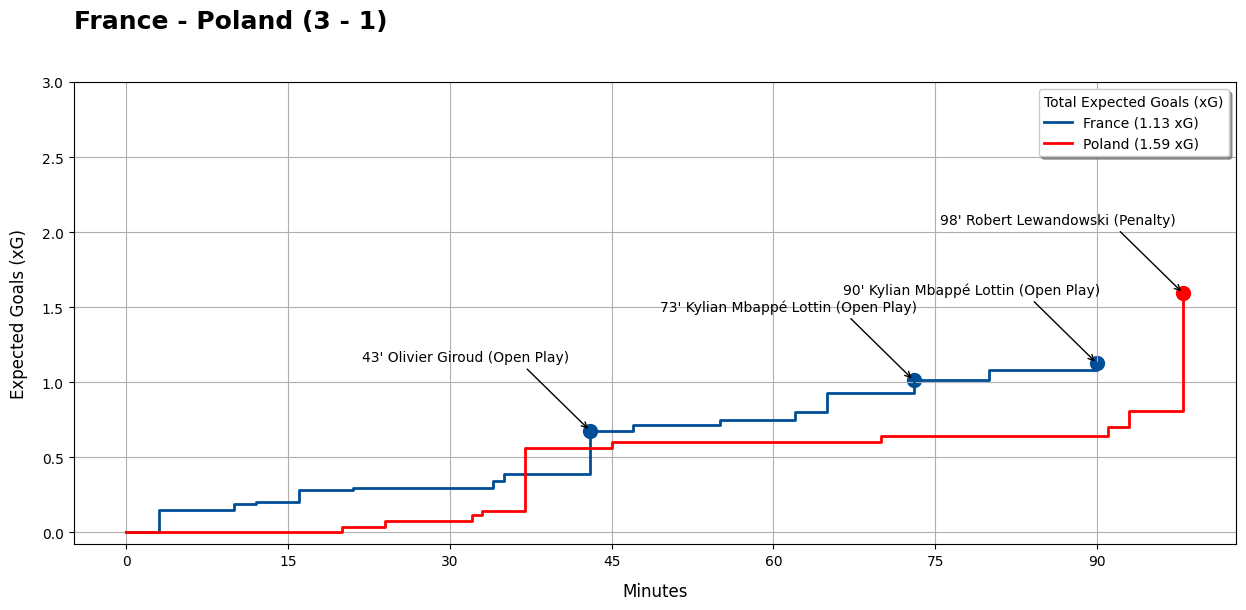

In [81]:
fig, ax = plt.subplots(figsize=(15,6))

# Create line plots
ax.step(x = h_df['minute'], y = h_df['h_cum'], where = 'post', color ='#004d98', label= hteam + " (" + h_total + " xG)"  ,linewidth=2)  
ax.step(x = a_df['minute'], y = a_df['a_cum'], where = 'post', color = 'red', label= ateam + " (" + a_total + " xG)" ,linewidth=2)

# Create scatter plot for highlighting the goal
ax.scatter(x= h_goal['minute'], y = h_goal['h_cum'] , marker= 'o', s= 100 ,color = '#004d98')
ax.scatter(x= a_goal['minute'], y = a_goal['a_cum'] , marker= 'o', s =100, color = 'red')


# Customize our chart
for j, txt in h_goal['scorechart'].iteritems():
    ax.annotate(txt, (h_goal['minute'][j], h_goal['h_cum'][j]),xycoords='data',ha='center',
                xytext=(-90, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'black'))

for i, txt in a_goal['scorechart'].iteritems():
    ax.annotate(txt, (a_goal['minute'][i], a_goal['a_cum'][i]),xycoords='data', ha='center',
                xytext=(-90, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'black'))


plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.grid()

fig.text(s=hteam + " - " + ateam + " (" + h_total_goals + " - " + a_total_goals + ")", x=0.125, y=0.97, fontsize=18,fontweight="bold")
legend = ax.legend(title = 'Total Expected Goals (xG)' ,loc='best', shadow=True)
legend._legend_box.align = 'baseline'

plt.ylabel("Expected Goals (xG)", fontsize = 12, labelpad = 10)
plt.xlabel("Minutes", fontsize = 12, labelpad = 10)
plt.show()

In [ ]:
'baseline', 'left', 'top', 'right', 'bottom', 'center'